In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage as nd
from scipy import signal as sg
from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel
import skimage.measure
import statistics as st

In [27]:
# root_dir of where the data is
root_dir = '../../data/'

# Location of images.
image_dir = root_dir + 'images/'

# Location of where to write features.
feature_dir = root_dir + 'features/'

# The .csv file containing the image names and classes.
image_file = root_dir + 'image_names_classes.csv'

In [28]:
# Number of images.
n_images = 218

# Read image names and classes .csv file.
image_names_classes = pd.read_csv(image_file, header=None )

In [29]:
features=[]
for i in range(n_images):
    filename = image_dir + image_names_classes[0][i]    
    img = plt.imread(filename)
    entropy = skimage.measure.shannon_entropy(img)
    features.append(entropy)

In [30]:
# Create a dictionary for the classes 
dic_classes={}
dic_classes[1]=26
dic_classes[2]=25
dic_classes[3]=37
dic_classes[4]=58
dic_classes[5]=72

In [31]:
# Compute recall and precision



precision_dict={}
recal_dict={}

precision_mean_list=[]
recall_mean_list=[]

for query_image in range(n_images):
    distances = np.zeros(n_images)
    precision_dict[query_image]=np.zeros(n_images)
    recal_dict[query_image]=np.zeros(n_images)
    for i in range(n_images):
        distances[i] = 0
        
            #distances[i] = distances[i] + ((features[query_image][j] - features[i][j])**2) #L2 distance
            #distances[i] = distances[i] + abs((features[query_image][j] - features[i][j])) #L1 distance
        distances[i] = distances[i] + abs((features[query_image] - features[i])) #stdv distance
        #distances[i] = distances[i] ** 0.5 #L2 distance
    sorted_index = np.argsort(distances)
    #print(sorted_index)
    count = 0
    total_no_images=0
    for s in range(len(sorted_index)):
            if image_names_classes[1][query_image] == image_names_classes[1][sorted_index[s]]:
               count += 1
            precision = count / (s+1)
            precision_dict[query_image][s]=precision
            recall = count / dic_classes[image_names_classes[1][query_image]]
            recal_dict[query_image][s]=recall
    

In [32]:
precision_dict_interpolated={}

rec_ref=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


for query_image in range(n_images):
    pr_point =precision_dict[query_image]

    rec_point=recal_dict[query_image]

    precision_dict_interpolated[query_image]=[0] * (len(recal_dict[0]))
    for r in range(len(rec_ref)):
        indexs= np.where(rec_point >= rec_ref[r])
        #print(indexs[0][0])
        precision_dict_interpolated[query_image][r]=pr_point[indexs[0][0]]

0.35879363553122995


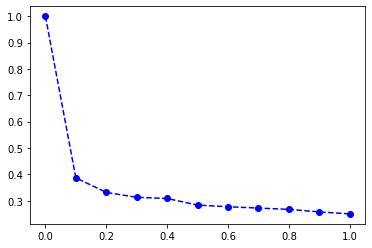

In [33]:
# Plot precision - recall curve
sum_precision = [0] * (11)
avg_precision_list = [0] * (11)
for query_image in range(n_images):
    for x in range(11):
        sum_precision[x] += precision_dict_interpolated[query_image][x]
    
for query_image in range(11):
    avg_precision_list[query_image]=sum_precision[query_image]/n_images

print(st.mean(avg_precision_list))

plt.plot(rec_ref, avg_precision_list, '--bo')
plt.show()

In [25]:
for i in range(n_images):
    filename = image_dir + image_names_classes[0][i]    
    img = plt.imread(filename)
    marg = np.histogramdd(np.ravel(img), bins = 256)[0]/img.size
    marg = list(filter(lambda p: p > 0, np.ravel(marg)))
    entropy = -np.sum(np.multiply(marg, np.log10(marg)))
    #print(entropy)

In [34]:
print(avg_precision_list)

[1.0, 0.3867304077456375, 0.33153822119899334, 0.3128689733370583, 0.30843289842688526, 0.28336219200480495, 0.27715972913925674, 0.27212612379621837, 0.26708318092452205, 0.2575299147505375, 0.24989834951961554]
